# Importing all the libraries

In [2]:
import warnings
warnings.filterwarnings('ignore') #Detect Errors

In [4]:
import pandas as pd #DataFrames
import numpy as np #Arrays
import matplotlib.pyplot as plt #Graphics and Visualizations
import statistics as st #Simple statistics(mean, median, mope, etc)
import seaborn as sns #Statistics visualizations
from scipy.stats import skew #asymmetry of a distribution
from scipy.stats import kurtosis #curtosis of a distribution

import os #To obtain the workspace

#Setting a random seed to predict data
np.random.seed(1306)

In [13]:
#There's 2 datasets:
#list: A unique dataset with the characteristics of the films. Has a relation 1 to many with reviews
#reviews: A dataset that inherits the list id as a foreign key
path_list = 'data/imdb_list.csv'
df_list = pd.read_csv(path_list, sep=',')
df_list.head()

,Unnamed: 0,id,title,rating,genre,year
0,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
1,1,tt3774694,Love,6.1,"Drama, Romance",2015
2,2,tt2361509,The Intern,7.1,"Comedy, Drama",2015
3,3,tt2381249,Mission: Impossible - Rogue Nation,7.4,"Action, Adventure, Thriller",2015
4,4,tt3460252,The Hateful Eight,7.8,"Crime, Drama, Mystery",2015


# Analyzing the list DataFrame


In [16]:
df_list.info() #We have no nulls in this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   id          250 non-null    object 
 2   title       250 non-null    object 
 3   rating      250 non-null    float64
 4   genre       250 non-null    object 
 5   year        250 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.8+ KB


In [18]:
#Method to analyze all the dataframes
def check_data(dataframe, head=5):
    print(" QUANTITY OF ROWS AND COLUMNS ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" Data Types ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print()
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print()
    print(" LOST DATA ".center(70,'-'))
    print(dataframe.isnull().sum())
    print()
    print(" DUPLICATED ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print()
    print(" QUANTITLES ".center(70,'-'))
    df_num = dataframe.select_dtypes(include=['number'])
    print(df_num.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_data(df_list)

-------------------- QUANTITY OF ROWS AND COLUMNS --------------------
Rows: 250
Columns: 6
----------------------------- Data Types -----------------------------
Unnamed: 0      int64
id             object
title          object
rating        float64
genre          object
year            int64
dtype: object
-------------------------------- HEAD --------------------------------
   Unnamed: 0         id                               title  rating  \
0           0  tt0369610                      Jurassic World     6.9   
1           1  tt3774694                                Love     6.1   
2           2  tt2361509                          The Intern     7.1   
3           3  tt2381249  Mission: Impossible - Rogue Nation     7.4   
4           4  tt3460252                   The Hateful Eight     7.8   

                         genre  year  
0    Action, Adventure, Sci-Fi  2015  
1               Drama, Romance  2015  
2                Comedy, Drama  2015  
3  Action, Adventure, Thriller 

In [20]:
#The highest raiting of any film is 8.7
#The data we have if from 2015 to 2024

#Now, we want to analyze the statistics from the rating
# Mean
mean = st.mean(df_list['rating'])
print('Mean:', mean)

# Median
median = st.median(df_list['rating'])
print('Median:', median)

# Mode
mode = st.mode(df_list['rating'])
print('Mode:', mode)

Mean: 7.2804
Median: 7.3
Mode: 7.1


In [22]:
print('Top 5 Ratings Frequency:')
print(df_list['rating'].value_counts().head())

Top 5 Ratings Frequency:
rating
7.1    18
7.4    18
7.8    17
7.3    15
7.6    15
Name: count, dtype: int64


## Data Visualization of the list

In [25]:
#We'll save all the graphics in the folder Data_Visualization_Graphics_List
list_folder = 'Data_Visualization_Graphics_List' 

### 1.Number of films by genre

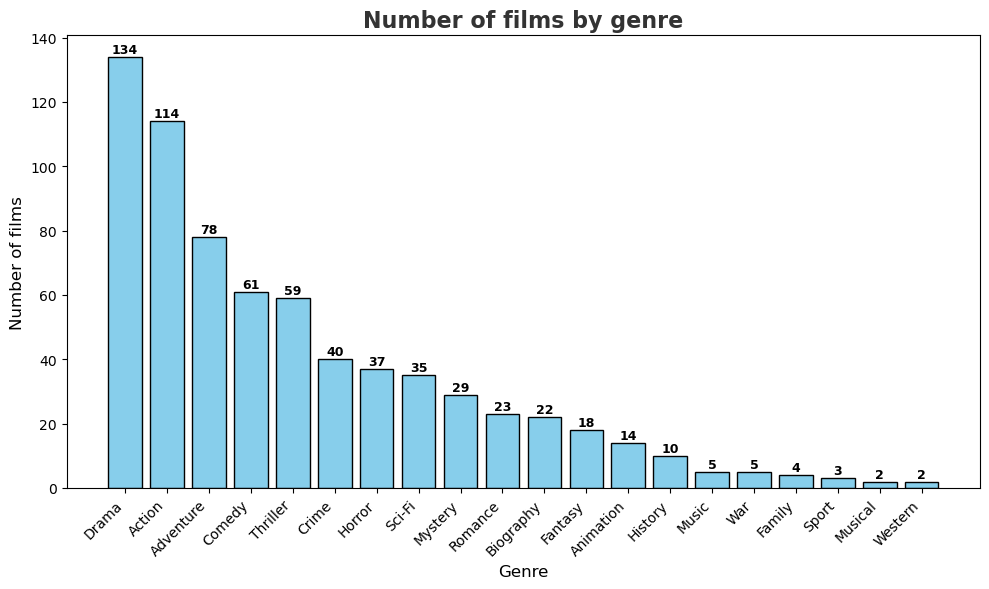

Graphic saved in Data_Visualization_Graphics_List\films_by_genre.png


In [28]:
#Creating a copy to not modify original data
df_genre = df_list.copy()
df_genre['genre'] = df_genre['genre'].str.split(', ') #Splitting the genres in the same row --> Adventure, Romance, Comedy --> ['Adventure','Romance','Comedy']
df_genre = df_genre.explode('genre')

genre_counts = df_genre['genre'].value_counts()

#Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Draw graphic
bars = ax.bar(genre_counts.index, genre_counts.values, color = 'skyblue', edgecolor = 'black')
#x = genre names
#y = number of films 

#Titles
ax.set_title('Number of films by genre', fontsize = 16, fontweight = 'bold', color = '#333333')
ax.set_ylabel('Number of films', fontsize = 12)
ax.set_xlabel('Genre', fontsize = 12)
ax.set_xticklabels(genre_counts.index, rotation = 45, ha = 'right', fontsize = 10) #45° to see the genre names

for bar in bars:
    yval = bar.get_height() #Obtain the height
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval),
           ha = 'center', va='bottom', fontsize = 9, fontweight = 'bold')

plt.tight_layout()
plt.show()

#Save graphic
name_file = os.path.join(list_folder, 'films_by_genre.png')
fig.savefig(name_file, dpi = 300)
print(f'Graphic saved in {name_file}')

### 2.Official Rating Distribution

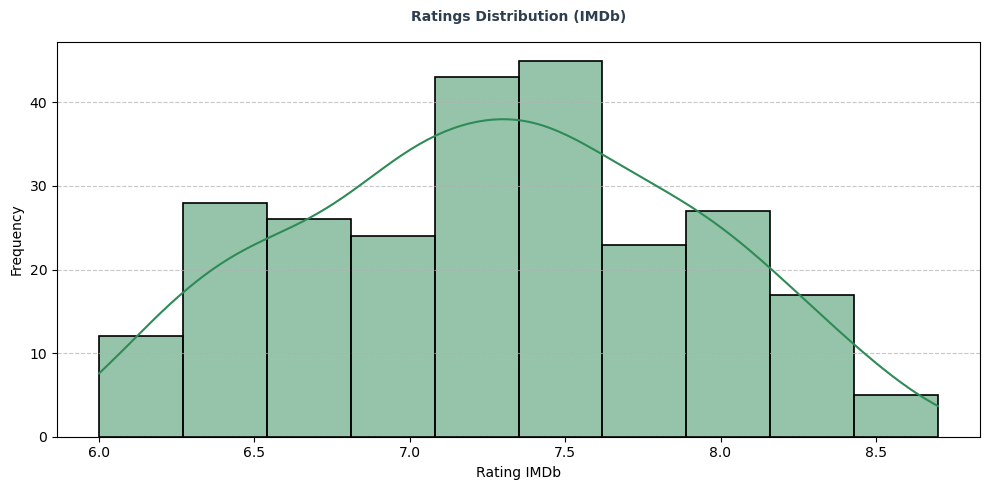

Graphic saved in Data_Visualization_Graphics_List\ratings_distribution.png


In [31]:
#Figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df_list['rating'], bins = 10, kde = True, color = 'seagreen', edgecolor = 'black', linewidth = 1.2, ax = ax)

ax.set_title('Ratings Distribution (IMDb)', fontsize = 10, fontweight = 'bold', color = '#2c3e50', pad=15)
ax.set_xlabel('Rating IMDb', fontsize = 10)
ax.set_ylabel('Frequency', fontsize = 10)


#Personalized
ax.grid(axis='y', linestyle = '--', alpha = 0.7)

#White background
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

#Save graphic
name_file = os.path.join(list_folder, 'ratings_distribution.png')
fig.savefig(name_file, dpi = 300)
print(f'Graphic saved in {name_file}')

# Analyze the Reviews DataFrame

In [34]:
path_review = 'data/imdb_reviews.csv'
df_review = pd.read_csv(path_review, sep=',')
df_review.head()

,imdb_id,review title,review_rating,review
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...
1,tt0369610,"Not a patch on the original Jurassic Park, and...",7.0,The original Jurassic Park still is a personal...
2,tt0369610,Its a Jurassic World after all.,7.0,The 4th film in the Jurassic Park series and t...
3,tt0369610,Worthy Sequel To One Of The Greatest Films Eve...,NaN,Let's start this by stating how much of a die ...
4,tt0369610,Manages to somewhat return the Jurassic Park s...,6.0,Modernized and polished entry to the Jurassic ...


In [36]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        6241 non-null   object 
 1   review title   6241 non-null   object 
 2   review_rating  5885 non-null   float64
 3   review         6241 non-null   object 
dtypes: float64(1), object(3)
memory usage: 195.2+ KB


In [38]:
check_data(df_review)

-------------------- QUANTITY OF ROWS AND COLUMNS --------------------
Rows: 6241
Columns: 4
----------------------------- Data Types -----------------------------
imdb_id           object
review title      object
review_rating    float64
review            object
dtype: object
-------------------------------- HEAD --------------------------------
     imdb_id                                       review title  \
0  tt0369610  Spielberg Magic, This Is Not. Still, a Visit t...   
1  tt0369610  Not a patch on the original Jurassic Park, and...   
2  tt0369610                    Its a Jurassic World after all.   
3  tt0369610  Worthy Sequel To One Of The Greatest Films Eve...   
4  tt0369610  Manages to somewhat return the Jurassic Park s...   

   review_rating                                             review  
0            7.0  You may have heard some critics champion Juras...  
1            7.0  The original Jurassic Park still is a personal...  
2            7.0  The 4th film in the 

In [40]:
#There're 356 NaN's values in review_rating. We'll clean that information
df_review_clean = df_review.dropna(subset=['review_rating']) 
df_review_clean['review_rating'] = pd.to_numeric(df_review_clean['review_rating'], errors = 'coerce')
#From now on, we'll work with review_rating

In [42]:
df_review_clean.review_rating.value_counts() #7.0 is the most common rating for a film

review_rating
7.0     1293
6.0     1293
10.0     931
8.0      911
9.0      797
5.0      258
4.0      133
3.0      111
1.0       91
2.0       67
Name: count, dtype: int64

In [44]:
#Now, we want to analyze the statistics from the users ratings
# Mean
mean = st.mean(df_review_clean['review_rating'])
print('Mean:', mean)

# Median
median = st.median(df_review_clean['review_rating'])
print('Median:', median)

# Mode
mode = st.mode(df_review_clean['review_rating'])
print('Mode:', mode)

Mean: 7.299915038232795
Median: 7.0
Mode: 7.0


In [46]:
print('Top 5 Reviews Ratings Frequency:')
print(df_review_clean['review_rating'].value_counts().head())

Top 5 Reviews Ratings Frequency:
review_rating
7.0     1293
6.0     1293
10.0     931
8.0      911
9.0      797
Name: count, dtype: int64


## Data Visualization of the reviews

In [49]:
#We'll save all the graphics in the folder Data_Visualization_Graphics_Review
list_folder = 'Data_Visualization_Graphics_Review' 

### 1. Distribution of Users Reviews

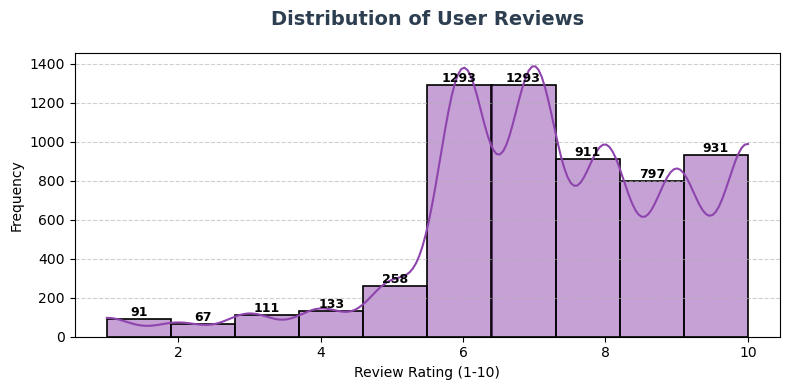

Graphic saved in Data_Visualization_Graphics_Review\user_reviews_distribution.png


In [52]:
fig, ax = plt.subplots(figsize=(8,4))

#Keeping the histogram in a variable to show the values of each column later
hist = sns.histplot(df_review_clean['review_rating'], bins = 10, kde = True, color = '#8e44ad', edgecolor = 'black', linewidth = 1.2, ax = ax)

#Titles
ax.set_title('Distribution of User Reviews', fontsize = 14, fontweight = 'bold', color = '#2c3e50', pad=20)
ax.set_xlabel('Review Rating (1-10)', fontsize = 10)
ax.set_ylabel('Frequency', fontsize = 10)

#Personalized
ax.grid(axis='y', linestyle = '--', alpha = 0.6)


#White background
fig.patch.set_facecolor('white')

# Show values
for bar in hist.patches: #patches contains all the columns of the histogram
    height = bar.get_height() #Quantity of data 
    if height > 0:  
        ax.text(
            bar.get_x() + bar.get_width() / 2, #horizontal position of the center of the bar
            height + 0.5, # Above the var
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            fontweight='bold'
        )
        
plt.tight_layout()
plt.show()

#Save graphic
name_file = os.path.join(list_folder, 'user_reviews_distribution.png')
fig.savefig(name_file, dpi = 300)
print(f'Graphic saved in {name_file}')

### 2. Variability of User Reviews

Q1 (25%): 6.00, Mediana: 7.00, Q3 (75%): 9.00


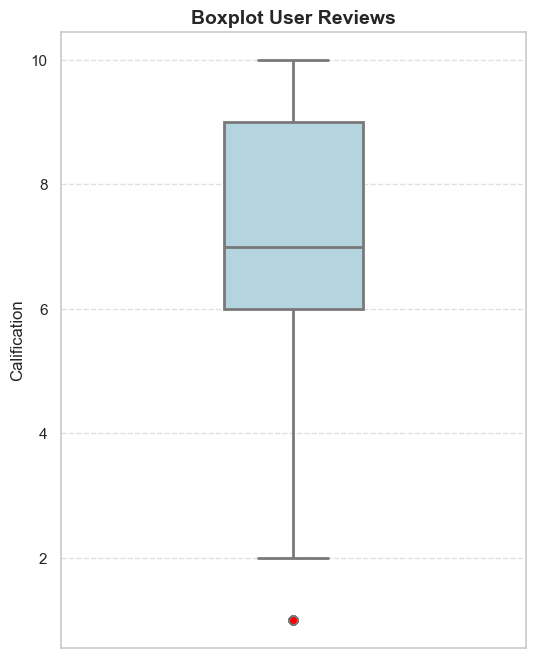

Graphic saved in Data_Visualization_Graphics_Review\variability_user_reviews.png


In [55]:
fig2 = plt.figure(figsize=(6,8))

sns.set(style='whitegrid')

sns.boxplot(
    y=df_review_clean['review_rating'], 
    color = 'lightblue', 
    width = 0.3, 
    linewidth = 2, 
    fliersize=6, #Outliers size
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')  # Otliers style
)
plt.title('Boxplot User Reviews', fontsize = 14, fontweight = 'bold')
plt.ylabel('Calification', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha = 0.6)

# Mostrar valores resumen si deseas
q1 = df_review_clean['review_rating'].quantile(0.25)
q2 = df_review_clean['review_rating'].quantile(0.50)
q3 = df_review_clean['review_rating'].quantile(0.75)
print(f"Q1 (25%): {q1:.2f}, Mediana: {q2:.2f}, Q3 (75%): {q3:.2f}")

plt.show()
#In this graphic, we can watch the min and max value of the review_rating, 1st and 3ra quartile amd the Outliers of the review_rating column

#Save graphic
name_file = os.path.join(list_folder, 'variability_user_reviews.png')
fig2.savefig(name_file, dpi = 300)
print(f'Graphic saved in {name_file}')

# Merging DataFrames 

In [58]:
#Standarize column names for both dataframes
df_list.columns = df_list.columns.str.strip()
df_review.columns = df_review.columns.str.strip()

In [60]:
#Obtaining null values from both dataframes
def null_values(df):
    print(f'\nMissing values:')
    print(df.isnull().sum())

null_values(df_list)
null_values(df_review)


Missing values:
Unnamed: 0    0
id            0
title         0
rating        0
genre         0
year          0
dtype: int64

Missing values:
imdb_id            0
review title       0
review_rating    356
review             0
dtype: int64


In [62]:
#Converting year column into numeric. errors= 'coerce' allows NaN values
df_list['year'] = pd.to_numeric(df_list['year'], errors='coerce')

#Merging columns
df_merged = pd.merge(df_review, df_list, left_on='imdb_id',right_on='id',how='left')

#Merge work like JOIN in SQL
#df_review = left join
#df_list = right join
#left_on = imdb_id is the foreign key
#right_on = id is the principal key
#how = left because we want all the reviews, even if they're not related with the list
df_merged.head()

,imdb_id,review title,review_rating,review,Unnamed: 0,id,title,rating,genre,year
0,tt0369610,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
1,tt0369610,"Not a patch on the original Jurassic Park, and...",7.0,The original Jurassic Park still is a personal...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
2,tt0369610,Its a Jurassic World after all.,7.0,The 4th film in the Jurassic Park series and t...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
3,tt0369610,Worthy Sequel To One Of The Greatest Films Eve...,NaN,Let's start this by stating how much of a die ...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
4,tt0369610,Manages to somewhat return the Jurassic Park s...,6.0,Modernized and polished entry to the Jurassic ...,0,tt0369610,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


In [64]:
#Dropping unnecesary columns
df_merged = df_merged.drop(columns = ['Unnamed: 0', 'imdb_id','id'])

In [66]:
print(df_merged.columns)

Index(['review title', 'review_rating', 'review', 'title', 'rating', 'genre',
       'year'],
      dtype='object')


In [68]:
df_merged.head()

,review title,review_rating,review,title,rating,genre,year
0,"Spielberg Magic, This Is Not. Still, a Visit t...",7.0,You may have heard some critics champion Juras...,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
1,"Not a patch on the original Jurassic Park, and...",7.0,The original Jurassic Park still is a personal...,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
2,Its a Jurassic World after all.,7.0,The 4th film in the Jurassic Park series and t...,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
3,Worthy Sequel To One Of The Greatest Films Eve...,NaN,Let's start this by stating how much of a die ...,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015
4,Manages to somewhat return the Jurassic Park s...,6.0,Modernized and polished entry to the Jurassic ...,Jurassic World,6.9,"Action, Adventure, Sci-Fi",2015


In [70]:
df_merged.nunique()

review title     6084
review_rating      10
review           6215
title             250
rating             28
genre              88
year               10
dtype: int64

# Duplicating DataFrame to reorder the columns

In [73]:
df_merged2 = df_merged2 =  df_merged[['year','title','genre','rating','review title','review','review_rating']]
df_merged2.head()

,year,title,genre,rating,review title,review,review_rating
0,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,"Spielberg Magic, This Is Not. Still, a Visit t...",You may have heard some critics champion Juras...,7.0
1,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,"Not a patch on the original Jurassic Park, and...",The original Jurassic Park still is a personal...,7.0
2,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,Its a Jurassic World after all.,The 4th film in the Jurassic Park series and t...,7.0
3,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,Worthy Sequel To One Of The Greatest Films Eve...,Let's start this by stating how much of a die ...,NaN
4,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,Manages to somewhat return the Jurassic Park s...,Modernized and polished entry to the Jurassic ...,6.0


In [75]:
check_data(df_merged2)

-------------------- QUANTITY OF ROWS AND COLUMNS --------------------
Rows: 6291
Columns: 7
----------------------------- Data Types -----------------------------
year               int64
title             object
genre             object
rating           float64
review title      object
review            object
review_rating    float64
dtype: object
-------------------------------- HEAD --------------------------------
   year           title                      genre  rating  \
0  2015  Jurassic World  Action, Adventure, Sci-Fi     6.9   
1  2015  Jurassic World  Action, Adventure, Sci-Fi     6.9   
2  2015  Jurassic World  Action, Adventure, Sci-Fi     6.9   
3  2015  Jurassic World  Action, Adventure, Sci-Fi     6.9   
4  2015  Jurassic World  Action, Adventure, Sci-Fi     6.9   

                                        review title  \
0  Spielberg Magic, This Is Not. Still, a Visit t...   
1  Not a patch on the original Jurassic Park, and...   
2                    Its a Jurassic

# Analyzing the official ratings and the users ratings

In [78]:
#Dropping lost data from review_rating to do data analysis
df_merged2 = df_merged2.dropna(subset=['review_rating'])

In [80]:
#The best official rating for a film is 8.7
#While the best user rating for a film is 10.0
df_merged2['rating'].max() , df_review['review_rating'].max()

(8.7, 10.0)

In [82]:
#The worst official rating for a film is 6.0
#While the best user rating for a film is 1.0
df_merged2['rating'].min() , df_review['review_rating'].min()

(6.0, 1.0)

In [84]:
def statistics_basics_df(df, column, wawa):
    mean = st.mean(df[column])
    print(f'Mean of {wawa}:', mean)
    # Median
    median = st.median(df[column])
    print(f'Median of {wawa}:', median)
    # Mode
    mode = st.mode(df[column])
    print(f'Mode of {wawa}:', mode)

print('Statistics from the official rating')
statistics_basics_df(df_merged2, 'rating', 'the official rating')
print('\nStatistics from the users rating')
statistics_basics_df(df_merged2, 'review_rating','the users rating')

Statistics from the official rating
Mean of the official rating: 7.283830719946046
Median of the official rating: 7.3
Mode of the official rating: 7.1

Statistics from the users rating
Mean of the users rating: 7.303658742201989
Median of the users rating: 7.0
Mode of the users rating: 6.0


In [86]:
df_merged2[df_merged2['rating'] == 7.1].shape[0]

426

In [88]:
df_merged2[df_merged2['review_rating'] == 6.0].shape[0]

1303

### Dispersion Measures

In [91]:
np.var(df_merged2['rating'])

0.38985995043716876

In [93]:
np.std(df_merged2['rating'])

0.6243876603818886

In [95]:
np.var(df_merged2['review_rating'])

3.764645187201904

In [97]:
np.std(df_merged2['review_rating'])

1.9402693594452045

In [99]:
df_merged2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5931.0,2019.523183,2.881047,2015.0,2017.0,2020.0,2022.0,2024.0
rating,5931.0,7.283831,0.624440,6.0,6.8,7.3,7.8,8.7
review_rating,5931.0,7.303659,1.940433,1.0,6.0,7.0,9.0,10.0


## Data Visualization of the merging DataFrame

### 1.Distribution of Users Reviews

In [103]:
#We'll save all the graphics in the folder Data_Visualization_Graphics_Merged
list_folder = 'Data_Visualization_Graphics_Merged' 

In [105]:
#1. Split the genres data
df_genre2 = df_merged2.copy()
df_genre2['genre'] = df_genre2['genre'].str.split(', ')

#2. Expand the list in rows
df_genre2 = df_genre2.explode('genre')

#3. Obtaining the top 10 genres
top10_genres = df_genre2.groupby('genre')['review_rating'].mean().sort_values(ascending = False).head(10)

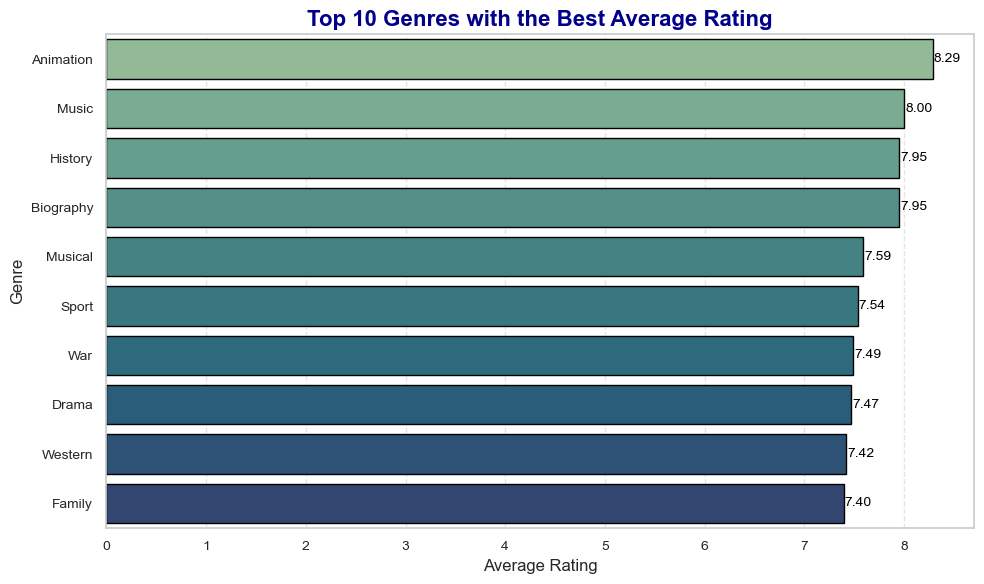

Graphic saved in Data_Visualization_Graphics_Merged\top10_genres_best_average_rating.png


In [107]:
sns.set(style = 'whitegrid')

fig3 = plt.figure(figsize=(10,6))

sns.barplot(
    x=top10_genres.values, 
    y=top10_genres.index, 
    palette = 'crest', 
    edgecolor = 'black')
    
plt.title('Top 10 Genres with the Best Average Rating', fontsize = 16, fontweight = 'bold', color = 'darkblue')

plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, value in enumerate(top10_genres.values):
        plt.text(value + 0.01, i, f'{value:.2f}', va= 'center', fontsize = 10, color = 'black')

plt.grid(axis='x', linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()


#Save graphic
name_file = os.path.join(list_folder, 'top10_genres_best_average_rating.png')
fig3.savefig(name_file, dpi = 300)
print(f'Graphic saved in {name_file}')

### 2.Top 3 titles with the best reviews

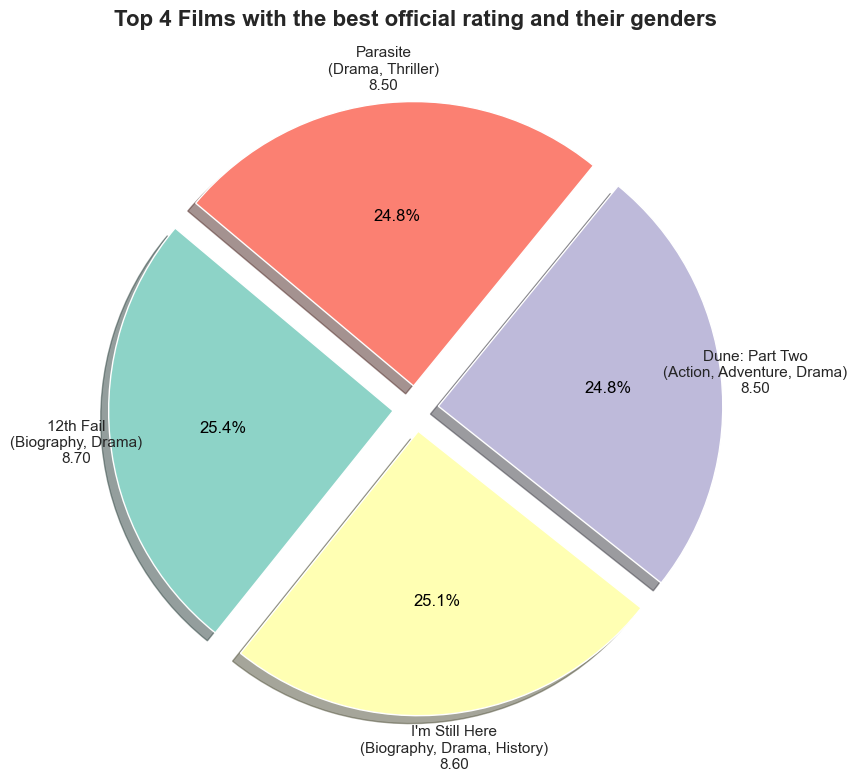

Graphic saved in Data_Visualization_Graphics_Merged\top4_films_best_official_rating.png


In [109]:
df_merged2 = df_merged2.dropna(subset=['title', 'rating', 'genre'])

# Top 4 titles with the most official ratings
top4 = df_merged2.groupby(['title', 'genre'], as_index=False)['rating'].mean().sort_values(by='rating', ascending=False).head(4)

# Title (Gender)
labels = [f"{row['title']}\n({row['genre']})" for _, row in top4.iterrows()]
sizes = top4['rating'].tolist()

# Color and styles
colors = plt.cm.Set3.colors
explode = [0.08] * len(top4)  # Split the portions a littl

fig4, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%",
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'color': 'black'}
)


# Agregar etiquetas externas (nombre + género + valor real)
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2
    x = wedge.r * 1.2 * np.cos(np.deg2rad(ang))
    y = wedge.r * 1.2 * np.sin(np.deg2rad(ang))
    ax.text(x, y, f"{labels[i]}\n{sizes[i]:.2f}", ha='center', va='center', fontsize=11)
    
plt.title('Top 4 Films with the best official rating and their genders', fontsize=16, fontweight='bold', loc = 'center', pad=20)

plt.tight_layout()
plt.show()

#Save graphic
name_file = os.path.join(list_folder, 'top4_films_best_official_rating.png')
fig4.savefig(name_file, dpi = 300)
print(f'Graphic saved in {name_file}')

In [110]:
df_merged2.shape

(5931, 7)

# Machine Learning

## We'll predict the official ratings with regression

In [114]:
from sklearn.model_selection import train_test_split #Train data
from sklearn.ensemble import RandomForestRegressor #
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [117]:
df_merged2.head()

,year,title,genre,rating,review title,review,review_rating
0,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,"Spielberg Magic, This Is Not. Still, a Visit t...",You may have heard some critics champion Juras...,7.0
1,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,"Not a patch on the original Jurassic Park, and...",The original Jurassic Park still is a personal...,7.0
2,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,Its a Jurassic World after all.,The 4th film in the Jurassic Park series and t...,7.0
4,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,Manages to somewhat return the Jurassic Park s...,Modernized and polished entry to the Jurassic ...,6.0
5,2015,Jurassic World,"Action, Adventure, Sci-Fi",6.9,Very good but more a remake of the first two m...,"Like it's dinosaur Frankenstein creation, Jura...",7.0


In [120]:
X = df_merged2[['genre', 'year']]
y = df_merged2['rating']
X.head(5)

,genre,year
0,"Action, Adventure, Sci-Fi",2015
1,"Action, Adventure, Sci-Fi",2015
2,"Action, Adventure, Sci-Fi",2015
4,"Action, Adventure, Sci-Fi",2015
5,"Action, Adventure, Sci-Fi",2015


In [122]:
y.head(5)

0    6.9
1    6.9
2    6.9
4    6.9
5    6.9
Name: rating, dtype: float64

In [124]:
# Cathegoric gender
preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(handle_unknown='ignore'),['genre'])
    ],
    remainder='passthrough')

# Pipeline preprocess + model
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R²:', r2_score(y_test, y_pred))

RMSE: 0.2821990284281754
R²: 0.7941072519126429
